# Data Analysis
# Practical 8

# Preprocessing

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [70]:
credit_card = pd.read_csv('credit_card.csv')
credit_card.head(20)

,gender,age,job,marital,education,default,housing,loan,contact,CreditCard
0,female,56,housemaid,married,basic.4y,no,no,no,telephone,no
1,male,57,services,married,high.school,yes,no,no,telephone,no
2,female,37,services,married,high.school,no,yes,no,telephone,no
3,female,40,admin.,married,basic.6y,no,no,no,telephone,no
4,female,56,services,married,high.school,no,no,yes,telephone,no
5,male,45,services,married,basic.9y,yes,no,no,telephone,no
6,male,59,admin.,married,professional.course,no,no,no,telephone,no
7,male,41,blue-collar,married,unknown,yes,no,no,telephone,no
8,male,24,technician,single,professional.course,no,yes,no,telephone,no
9,female,25,services,single,high.school,no,yes,no,telephone,no


In [71]:
credit_card.shape

(41188, 10)

In [72]:
credit_card.describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


In [73]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gender      41188 non-null  object
 1   age         41188 non-null  int64 
 2   job         41188 non-null  object
 3   marital     41188 non-null  object
 4   education   41188 non-null  object
 5   default     41188 non-null  object
 6   housing     41188 non-null  object
 7   loan        41188 non-null  object
 8   contact     41188 non-null  object
 9   CreditCard  41188 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.1+ MB


In [74]:
credit_card.describe(include=['object', 'category'])

,gender,job,marital,education,default,housing,loan,contact,CreditCard
count,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,2,12,4,8,2,2,2,2,2
top,female,admin.,married,university.degree,no,yes,no,cellular,no
freq,20798,10422,24928,12168,32588,22566,33950,26144,36548


# Q1: What is the Probability that the Customer has a Credit Card ?

In [75]:
cnt = 0
all_CC = credit_card['CreditCard'].count()
have_CC = credit_card['CreditCard'].value_counts()['yes']
all_CC
print(f"P(have CC) = {have_CC/all_CC:.4f}")

P(have CC) = 0.1127


# Q2: What is the Probability that the Customer age is greater than 50 ?

In [76]:
age_50plus = (credit_card['age']>50).sum()
age_50plus 

np.int64(7180)

In [77]:
print(f"P(age > 50) = {age_50plus/all_CC:.4f}")

P(age > 50) = 0.1743


<Axes: >

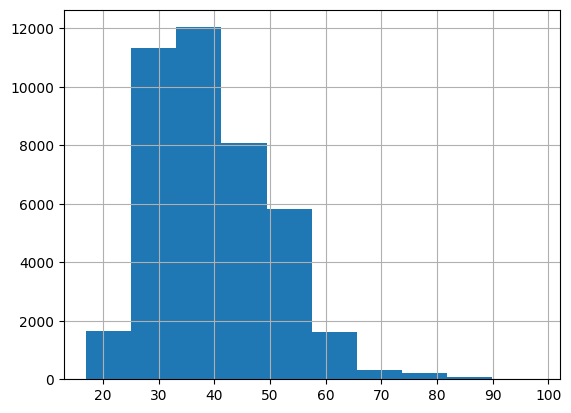

In [126]:
credit_card['age'].hist()

# Q3: What is the probability that the customer is illiterate?

In [89]:
illiterate = (credit_card['education'] == 'illiterate').sum()
illiterate

np.int64(18)

In [ ]:
print(f"P(Illiterate) = {illiterate/all_CC:.4f}")

P(Illiterate) = 0.0004


# Q4: What is the Probability that the Customer has a Telephone ?

In [96]:
contact_cnt = (credit_card["contact"]).value_counts()
contact_cnt

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [97]:
has_tp = contact_cnt['telephone']
has_tp

np.int64(15044)

In [82]:
print(f"P(Has telephone) = {has_tp/all_CC:.4f}")

P(Has telephone) = 0.3653


# Q5: What is the Probability that the Customer is Single and has a Credit Card ?

In [94]:
single_cnt = credit_card['marital'].value_counts()['single']
single_cnt

np.int64(11568)

In [95]:
print(f"P(Single AND Have CC) = {(have_CC/all_CC) * (single_cnt/all_CC):.4f}")

P(Single AND Have CC) = 0.0316


# Q6: What is the Probability that the Customer is Male and has at most 6 Year of Education ?

In [98]:
edu_cnt = credit_card['education'].value_counts()
atmost_6_yrs_edu = edu_cnt['basic.4y'] + edu_cnt['basic.6y'] + edu_cnt['illiterate']
atmost_6_yrs_edu

np.int64(6486)

In [93]:
male_cnt = credit_card['gender'].value_counts()['male']
male_cnt

np.int64(20390)

In [99]:
print(f"P(At most 6 years of edu AND Male) = {atmost_6_yrs_edu/all_CC * male_cnt/all_CC:.4f}")

P(At most 6 years of edu AND Male) = 0.0780


# Q7: What is the Probability that the Customer is Retired and is divorced ?

In [106]:
retired_cnt = credit_card['job'].value_counts()['retired']
retired_cnt

np.int64(1720)

In [107]:
divorced_cnt = credit_card['marital'].value_counts()['divorced']
divorced_cnt

np.int64(4612)

In [108]:
print(f"P(Retired AND Divorced) = {retired_cnt/all_CC * divorced_cnt/all_CC:.4f}")

P(Retired AND Divorced) = 0.0047


# Q8: Given the Customer has the credit card, find the probability that he/she is married ?
### P(Married|Have_CC) = P(Married AND Have_CC)/P(Have_CC)

In [113]:
married_have_CC_cnt = credit_card['marital'].value_counts()['married'] & credit_card['CreditCard'].value_counts()['yes']
married_have_CC_cnt

np.int64(32)

In [114]:
print(f"P(Married|Have_CC) = {(married_have_CC_cnt/have_CC):.4f}")

P(Married|Have_CC) = 0.0069


In [125]:
print(f"P(Married|Have_CC) = {((married_have_CC_cnt/all_CC) /(have_CC/all_CC) ):.4f}")

P(Married|Have_CC) = 0.0069


### This is suspiciously so low

# Q9 If a customer has a management job, find the probability that he has a housing

In [121]:
mngmnt_cnt = credit_card['job'].value_counts()['management']
mngmnt_cnt

np.int64(2924)

In [122]:
housing_cnt = credit_card['housing'].value_counts()['yes']
housing_cnt

np.int64(22566)

In [123]:
mngmnt_housing_cnt = credit_card['job'].value_counts()['management'] & credit_card['housing'].value_counts()['yes']
mngmnt_housing_cnt

np.int64(2084)

In [124]:
print(f"P(Mngmnt | Housing) = {mngmnt_housing_cnt/housing_cnt:.4f}")

P(Mngmnt | Housing) = 0.0924
